In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('labelled_dataset_full.csv')
#data_1=data.drop('lab_prevday')
data_1=data[['lab_sameday','Polarity','Open','High','Volume','Low']]
data_1.dropna(inplace=True)
data_1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,lab_sameday,Polarity,Open,High,Volume,Low
0,1.0,0.166667,145.66,147.4701,53477870.0,145.56
1,1.0,0.000000,145.66,147.4701,53477870.0,145.56
2,1.0,0.375000,145.66,147.4701,53477870.0,145.56
3,1.0,0.000000,145.66,147.4701,53477870.0,145.56
4,1.0,0.234091,145.66,147.4701,53477870.0,145.56
...,...,...,...,...,...,...
16463,1.0,0.000000,141.78,142.7685,4259952.0,141.50
16464,1.0,0.280000,141.78,142.7685,4259952.0,141.50
16465,1.0,0.000000,141.78,142.7685,4259952.0,141.50
16466,1.0,0.392857,141.78,142.7685,4259952.0,141.50


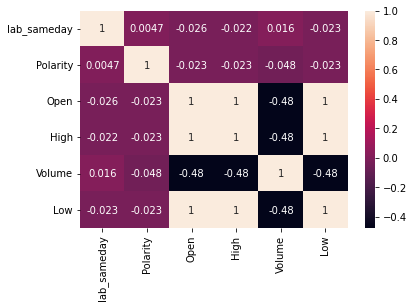

In [9]:
import seaborn as sns

# calculate the correlations
correlations = data_1.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)


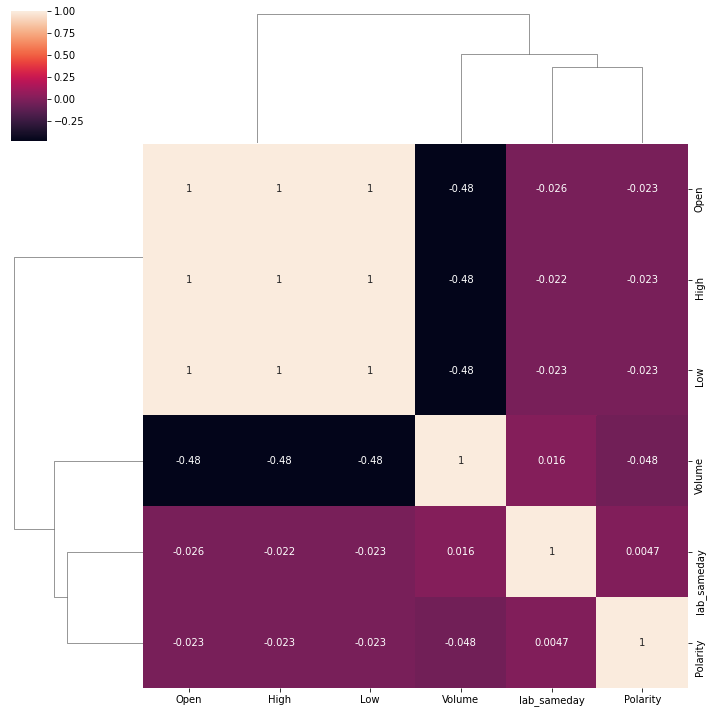

In [10]:

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)
#remove NUM_NEU and TOT_WORDS which are highly correlated

Text(0.5, 0, 'lab_sameday')

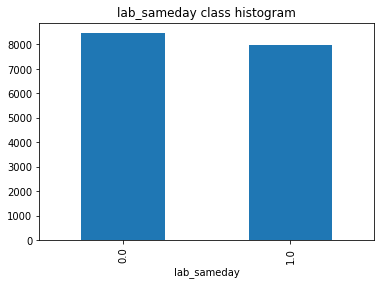

In [11]:
# Graph to show the Higly Imbalanced Data. To Predict the Column ['lab_sameday']. Right now.. majority of records/rows with 'Target=0'
# And few records with 'Target = 1'
pd.value_counts(data_1['lab_sameday']).plot.bar()
plt.title('lab_sameday class histogram')
plt.xlabel('lab_sameday')


In [12]:
# Class count
count_class_1, count_class_0 = data_1.lab_sameday.value_counts()
# Divide by class
df_class_0 = data_1[data_1['lab_sameday'] == 0]
df_class_1 = data_1[data_1['lab_sameday'] == 1]
print('Zero',count_class_0)
print('One',count_class_1)

Zero 7997
One 8471


After Random under-sampling:
0.0    8471
1.0    7997
Name: lab_sameday, dtype: int64


,lab_sameday,Polarity,Open,High,Volume,Low
8656,1.0,0.440833,3643.560,3759.98550,5180623.0,3621.120
7342,1.0,0.142857,3211.900,3280.90000,3268131.0,3210.005
8899,1.0,0.000000,3530.110,3685.48000,6744768.0,3529.000
6286,1.0,0.327273,123.765,125.17005,81870155.0,122.780
1961,1.0,0.200000,146.980,147.84000,46397670.0,146.170
...,...,...,...,...,...,...
15919,0.0,0.000000,143.000,143.16000,3074078.0,141.090
15920,0.0,0.500000,143.000,143.16000,3074078.0,141.090
15921,0.0,0.000000,143.000,143.16000,3074078.0,141.090
15922,0.0,0.200000,143.000,143.16000,3074078.0,141.090


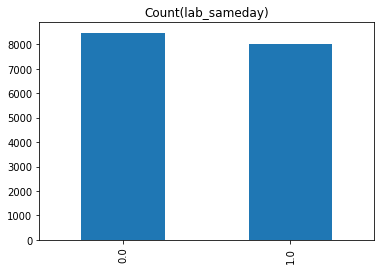

In [13]:
# Doing Random Undersampling to balance data
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print('After Random under-sampling:')
print(df_test_under.lab_sameday.value_counts())
df_test_under.lab_sameday.value_counts().plot(kind='bar', title='Count(lab_sameday)');
data_2=df_test_under
data_2

In [14]:
X=data_2[['Polarity','High','Low','Open']]
y=data_2['lab_sameday'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
# shape of the dataset
print('Shape of training data :',X_train.shape)
print('Shape of testing data :',X_test.shape)

Shape of training data : (13174, 4)
Shape of testing data : (3294, 4)


Text(0, 0.5, 'Polarity')

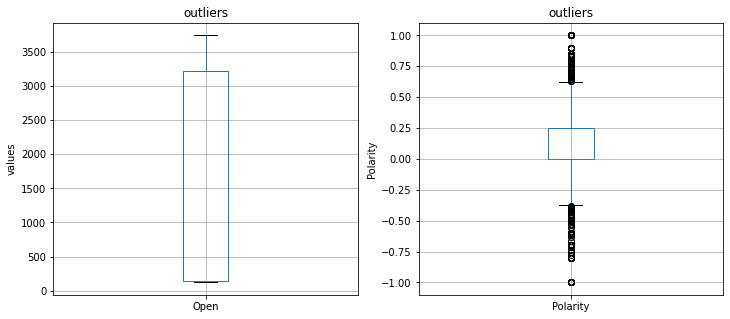

In [15]:
# draw boxplots to visualize outliers
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
fig = data_2.boxplot(column='Open')
fig.set_title('outliers')
fig.set_ylabel('values')


plt.subplot(1, 2, 2)
fig = data_2.boxplot(column='Polarity')
fig.set_title('outliers')
fig.set_ylabel('Polarity')
#The below boxplots confirm that there are lot of outliers in these variables.
#since the dataset contains outliers, so the value of C should be high while training the model.

Text(0, 0.5, 'Number of words')

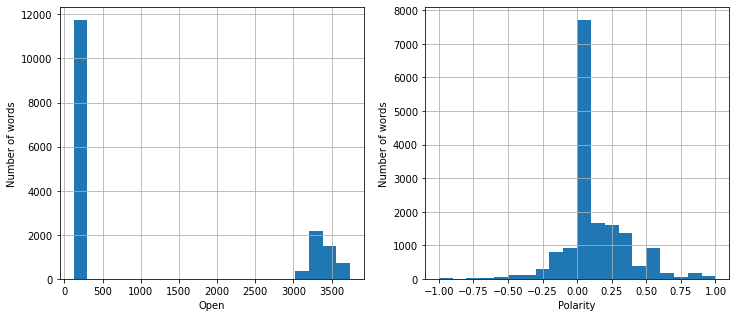

In [16]:
# plot histogram to check distribution,to find out if they are normal or skewed.

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
fig = data_2['Open'].hist(bins=20)
fig.set_xlabel('Open')
fig.set_ylabel('Number of words')


plt.subplot(1, 2, 2)
fig = data_2['Polarity'].hist(bins=20)
fig.set_xlabel('Polarity')
fig.set_ylabel('Number of words')
#All distributions are skewed

In [17]:
# Standard Scalar
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#Normalisation
from sklearn import preprocessing
# normalize the data attributes
X_train= preprocessing.normalize(X_train)
X_test= preprocessing.normalize(X_test)
import sklearn
from sklearn import svm
from collections import Counter

In [18]:
#SVM RBF kernel
clf = svm.SVC(C=1000,kernel='rbf',random_state=0)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('accuracy:',confidence)
y_pred_test = clf.predict(X_test)
print('predicted class counts:',Counter(y_pred_test))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

accuracy: 0.8582270795385549
predicted class counts: Counter({0.0: 1730, 1.0: 1564})
[[1475  212]
 [ 255 1352]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1687
         1.0       0.86      0.84      0.85      1607

    accuracy                           0.86      3294
   macro avg       0.86      0.86      0.86      3294
weighted avg       0.86      0.86      0.86      3294



Saving the model

In [22]:
import pickle
pickle.dump(clf,open('Pickle_svm_sameday_stock3.pkl','wb'))

In [23]:
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparam
#Compare the train-set and test-set accuracy
#compare the train-set and test-set accuracy to check for overfitting
y_pred_train = clf.predict(X_train)
#y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
#Compare model accuracy with null accuracy.Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.


Training-set accuracy score: 0.8617
Training set score: 0.8617
Test set score: 0.8582


In [24]:
# The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.
#One such metric to analyze the model performance in imbalanced classes problem is Confusion matrix.
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1475  212]
 [ 255 1352]]

True Positives(TP) =  1475

True Negatives(TN) =  1352

False Positives(FP) =  212

False Negatives(FN) =  255


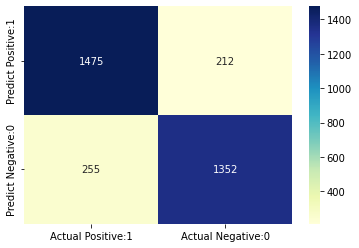

In [25]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
#Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1687
         1.0       0.86      0.84      0.85      1607

    accuracy                           0.86      3294
   macro avg       0.86      0.86      0.86      3294
weighted avg       0.86      0.86      0.86      3294



In [27]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8582


In [28]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
#Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
#Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
#True Positive Rate is synonymous with Recall.
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
#False Positive Rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
#specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))
#f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0.
#Support is the actual number of occurrences of the class in our dataset.


Classification error : 0.1418
Precision : 0.8743
Recall or Sensitivity : 0.8526
True Positive Rate : 0.8526
False Positive Rate : 0.1355
Specificity : 0.8645


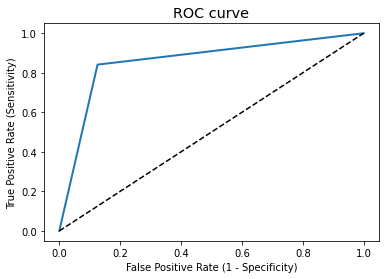

ROC AUC : 0.8578
Cross validated ROC AUC : 0.9369


In [29]:
#ROC - AUC 
#ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.
#The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
#ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.
#ROC AUC-ROC AUC stands for Receiver Operating Characteristic - Area Under Curve
#A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))
#ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))